<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1> Projet paris sportif </h1></center>
<center><h2> Bet-py </h2></center>
<center><h3> Notebook : de la création des features aux résultats des modèles </h3></center>
<hr style="border-width:2px;border-color:#75DFC1">


### Sommaire :
> <strong>I - Importation des modules</strong>

> <strong>II - Chargement des données</strong>

> <strong>III - Création des tables « data »</strong>

> <strong>IV - Préparation du Jeu De Données</strong>

> <strong>V - Entraînement des modèles, prédiction et évaluation</strong>
>> 1. GridSearch SVM
>> 2. KNN (GridSearch)
>> 3. Random Forest
>> 4. Réseau de neurones
>> 5. Réseau de neurones V2

### I - Importation des modules

In [2]:
import pandas as pd

In [3]:
import os

import numpy  as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble
from sklearn import model_selection

### II - Chargement des données

In [4]:
## Chargement des données
#os.chdir(r'D:\Users\User\Documents\Works\03 - Formations\02 - DataScientest\06 - Project\00 - Data\Football')
os.chdir(r'C:\Users\Romain Miclo\Dropbox (Compte personnel)\Formation DATA SCIENTIST\Datascientest\Projet Data Science\Data\Foot')

match_all = pd.read_csv('match_all.csv', index_col=0)

In [5]:
## Suppression des lignes ayant des NA dans la table « match_all »
match_all = match_all.dropna()

### III - Création des tables « data »

In [6]:
## Création de la table « data » principale

##########################
## ISSUES MATCH_RESULTS ##
##########################

data                        = pd.DataFrame(match_all[['Dom_Ext', 'CLB_Nb_jours', 'ADV_Nb_jours']])

data['Écart_Série_vic']     = match_all['CLB_Série_vic']   - match_all['ADV_Série_vic']
data['Écart_Série_vic_5']   = match_all['CLB_Série_vic_5'] - match_all['ADV_Série_vic_5']
data['Écart_Série_vic_3']   = match_all['CLB_Série_vic_3'] - match_all['ADV_Série_vic_3']
data['Écart_Série_vic_1']   = match_all['CLB_Série_vic_1'] - match_all['ADV_Série_vic_1']

data['Écart_buts_diff']     = match_all['CLB_Tot_buts_diff']   - match_all['ADV_Tot_buts_diff']
data['Écart_buts_diff_5']   = match_all['CLB_Tot_buts_diff_5'] - match_all['ADV_Tot_buts_diff_5']
data['Écart_buts_diff_3']   = match_all['CLB_Tot_buts_diff_3'] - match_all['ADV_Tot_buts_diff_3']
data['Écart_buts_diff_1']   = match_all['CLB_Tot_buts_diff_1'] - match_all['ADV_Tot_buts_diff_1']

data['Écart_buts_pour']     = match_all['CLB_Tot_buts_pour']   - match_all['ADV_Tot_buts_pour']
data['Écart_buts_pour_5']   = match_all['CLB_Tot_buts_pour_5'] - match_all['ADV_Tot_buts_pour_5']
data['Écart_buts_pour_3']   = match_all['CLB_Tot_buts_pour_3'] - match_all['ADV_Tot_buts_pour_3']
data['Écart_buts_pour_1']   = match_all['CLB_Tot_buts_pour_1'] - match_all['ADV_Tot_buts_pour_1']

data['Écart_buts_contre']   = match_all['ADV_Tot_buts_contre']   - match_all['CLB_Tot_buts_contre']
data['Écart_buts_contre_5'] = match_all['ADV_Tot_buts_contre_5'] - match_all['CLB_Tot_buts_contre_5']
data['Écart_buts_contre_3'] = match_all['ADV_Tot_buts_contre_3'] - match_all['CLB_Tot_buts_contre_3']
data['Écart_buts_contre_1'] = match_all['ADV_Tot_buts_contre_1'] - match_all['CLB_Tot_buts_contre_1']

########################
## ISSUES MATCH_INFOS ##
########################

# Activité des attaquants
data['Écart_Activité_att_5'] = match_all['CLB_Act_Tot_att_3H_5'] - match_all['ADV_Act_Tot_att_3H_5']
data['Écart_Activité_att_3'] = match_all['CLB_Act_Tot_att_3H_3'] - match_all['ADV_Act_Tot_att_3H_3']
data['Écart_Activité_att_1'] = match_all['CLB_Act_Tot_att_3H_1'] - match_all['ADV_Act_Tot_att_3H_1']

# Activité des défenseurs
data['Écart_Activité_def_5'] = match_all['CLB_Act_Tot_def_3H_5'] - match_all['ADV_Act_Tot_def_3H_5']
data['Écart_Activité_def_3'] = match_all['CLB_Act_Tot_def_3H_3'] - match_all['ADV_Act_Tot_def_3H_3']
data['Écart_Activité_def_1'] = match_all['CLB_Act_Tot_def_3H_1'] - match_all['ADV_Act_Tot_def_3H_1']

# Nombre d'arrêts du gardien
data['Écart_Arrêts_5']       = match_all['CLB_Gar_Tot_3H_5'] - match_all['ADV_Gar_Tot_3H_5']
data['Écart_Arrêts_3']       = match_all['CLB_Gar_Tot_3H_3'] - match_all['ADV_Gar_Tot_3H_3']
data['Écart_Arrêts_1']       = match_all['CLB_Gar_Tot_3H_1'] - match_all['ADV_Gar_Tot_3H_1']

# Nombre de fautes des joueurs adverses dans la zone proche de leurs buts
data['Écart_Fautes_5']       = match_all['CLB_Fte_Tot_3H_5'] - match_all['ADV_Fte_Tot_3H_5']
data['Écart_Fautes_3']       = match_all['CLB_Fte_Tot_3H_3'] - match_all['ADV_Fte_Tot_3H_3']
data['Écart_Fautes_1']       = match_all['CLB_Fte_Tot_3H_1'] - match_all['ADV_Fte_Tot_3H_1']

# Nombre de passes intelligentes de la part de l'équipe
data['Écart_Passes_5']       = match_all['CLB_Pass_Tot_3H_5'] - match_all['ADV_Pass_Tot_3H_5']
data['Écart_Passes_3']       = match_all['CLB_Pass_Tot_3H_3'] - match_all['ADV_Pass_Tot_3H_3']
data['Écart_Passes_1']       = match_all['CLB_Pass_Tot_3H_1'] - match_all['ADV_Pass_Tot_3H_1']

# Nombre de tirs dans la zone proche du but adverse
data['Écart_Tirs_5']         = match_all['CLB_Tirs_Tot_3H_5'] - match_all['ADV_Tirs_Tot_3H_5']
data['Écart_Tirs_3']         = match_all['CLB_Tirs_Tot_3H_3'] - match_all['ADV_Tirs_Tot_3H_3']
data['Écart_Tirs_1']         = match_all['CLB_Tirs_Tot_3H_1'] - match_all['ADV_Tirs_Tot_3H_1']

######################
## VARIABLES CIBLES ##
######################

data['[Résultat]']           = match_all['[Résultat]']
data['[CLB_Buts]']           = match_all['[CLB_Buts]']
data['[ADV_Buts]']           = match_all['[ADV_Buts]']

In [7]:
## Affichage pour vérification
data.iloc[:4, :].T

,426,427,450,451
Dom_Ext,1.0,0.0,1.0,0.0
CLB_Nb_jours,7.0,6.0,8.0,8.0
ADV_Nb_jours,6.0,7.0,8.0,8.0
Écart_Série_vic,1.0,-1.0,-2.0,2.0
Écart_Série_vic_5,1.0,-1.0,-2.0,2.0
Écart_Série_vic_3,0.0,0.0,-3.0,3.0
Écart_Série_vic_1,0.0,0.0,-1.0,1.0
Écart_buts_diff,6.0,-6.0,-6.0,6.0
Écart_buts_diff_5,5.0,-5.0,-6.0,6.0
Écart_buts_diff_3,-1.0,1.0,-9.0,9.0


### IV - Préparation du Jeu De Données

In [8]:
## Sélection du JDD à utiliser
dt     = data.drop(['[Résultat]', '[CLB_Buts]', '[ADV_Buts]'], axis=1)
target = data['[Résultat]']

In [9]:
## Séparation des données pour entraînement des modèles
#  -> les données sont triées dans l'ordre où les matchs se sont déroulés
X_train, X_test, y_train, y_test = train_test_split(dt, target, test_size=.2, shuffle=False)

In [10]:
# Changement dimensions suite au commentaire plus bas
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

# Instanciation scaler et application à X_train SAUF sur le fait d'être à domicile ou à l'extérieur
X_train2=X_train.drop(["Dom_Ext"],axis=1)
X_test2=X_test.drop(["Dom_Ext"],axis=1)
Dom_Ext_train=X_train["Dom_Ext"]
Dom_Ext_test=X_test["Dom_Ext"]
# On garde les index en mémoire
index_train=X_train.index
index_test=X_test.index

scaler = preprocessing.StandardScaler().fit(X_train2)
X_train_scaled=scaler.transform(X_train2)
#Puis standardiser la partie X_test sur le même scaler :
X_test_scaled=scaler.transform(X_test2)

# Puis on vient remettre le champ domicile ou extérieur et les index
X_train_scaled=pd.DataFrame(X_train_scaled)
X_train_scaled.index=index_train
X_train_scaled.insert(0,"Dom_Ext",Dom_Ext_train,True)

X_test_scaled=pd.DataFrame(X_test_scaled)
X_test_scaled.index=index_test
X_test_scaled.insert(0,"Dom_Ext",Dom_Ext_test,True)
X_test_scaled.head()

# Et enfin on remet le nom des colonnes
X_train_scaled.columns=X_train.columns
X_test_scaled.columns=X_test.columns

In [11]:
X_train_scaled.head().T

,426,427,450,451,462
Dom_Ext,1.000000,0.000000,1.000000,0.000000,1.000000
CLB_Nb_jours,-0.513583,-0.657467,-0.369698,-0.369698,-0.513583
ADV_Nb_jours,-0.657467,-0.513583,-0.369698,-0.369698,-0.225814
Écart_Série_vic,0.187279,-0.187279,-0.374557,0.374557,0.187279
Écart_Série_vic_5,0.506370,-0.506370,-1.012739,1.012739,0.506370
Écart_Série_vic_3,0.000000,0.000000,-2.138369,2.138369,0.000000
Écart_Série_vic_1,0.000000,0.000000,-1.432878,1.432878,1.432878
Écart_buts_diff,0.239978,-0.239978,-0.239978,0.239978,0.119989
Écart_buts_diff_5,0.548448,-0.548448,-0.658138,0.658138,0.329069
Écart_buts_diff_3,-0.158074,0.158074,-1.422669,1.422669,-0.158074


## V - Entraînement des modèles, prédiction et évaluation
### 1. GridSearch SVM

In [57]:
# Test sur des algorithmes unitaires

# Création d'un classificateur SVM
clf=svm.SVC(gamma=0.01,kernel='poly',random_state=123)

parametres={"C":[0.01,0.1,1,3,5,7,10],"kernel":['rbf', 'linear','poly'],"gamma":[0.001,0.005, 0.1,0.25, 0.5]}
grid_clf=model_selection.GridSearchCV(estimator=clf,param_grid=parametres,)

grille = grid_clf.fit(X_train_scaled,y_train)

In [60]:
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]])
print("\nLes meilleurs paramètres de la grille de recherche sont : ",grid_clf.best_params_)

                                              params  mean_test_score
0       {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}         0.685882
1    {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}         0.691765
2      {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}         0.676471
3       {'C': 0.01, 'gamma': 0.005, 'kernel': 'rbf'}         0.685882
4    {'C': 0.01, 'gamma': 0.005, 'kernel': 'linear'}         0.691765
..                                               ...              ...
100     {'C': 10, 'gamma': 0.25, 'kernel': 'linear'}         0.690588
101       {'C': 10, 'gamma': 0.25, 'kernel': 'poly'}         0.608824
102         {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}         0.622941
103      {'C': 10, 'gamma': 0.5, 'kernel': 'linear'}         0.690588
104        {'C': 10, 'gamma': 0.5, 'kernel': 'poly'}         0.608824

[105 rows x 2 columns]

Les meilleurs paramètres de la grille de recherche sont :  {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [59]:
# Application sur les meilleurs paramètres
clf=svm.SVC(gamma=0.001,kernel='linear',C=0.1,random_state=123)
clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
print("Score de la prédiction : ","%.3f"%clf.score(X_test_scaled,y_test))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score de la prédiction :  0.662


Classe prédite,0.0,1.0
Classe réelle,,
0.0,141,72
1.0,72,141


### 2. KNN (GridSearch)

In [61]:
knn=neighbors.KNeighborsClassifier(n_neighbors=7,metric="minkowski")
knn.fit(X_train_scaled, y_train)
y_pred=knn.predict(X_test_scaled)
print("Score de la prédiction : ","%.3f"%knn.score(X_test_scaled,y_test))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score de la prédiction :  0.606


Classe prédite,0.0,1.0
Classe réelle,,
0.0,129,84
1.0,84,129


In [74]:
# Test avec grille de recherche
# Création d'un classificateur KNN
knn=neighbors.KNeighborsClassifier(n_neighbors=7,metric="minkowski")

parametres={"n_neighbors":[4,5,7,10,15,30,50,75,100,250,500,750,1000],"metric":['minkowski','euclidean','manhattan','chebyshev']}
grid_knn=model_selection.GridSearchCV(estimator=knn,param_grid=parametres,)

grille = grid_knn.fit(X_train_scaled,y_train)

In [75]:
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]])
print("\nLes meilleurs paramètres de la grille de recherche sont : ",grid_knn.best_params_)

                                          params  mean_test_score
0      {'metric': 'minkowski', 'n_neighbors': 4}         0.628235
1      {'metric': 'minkowski', 'n_neighbors': 5}         0.634118
2      {'metric': 'minkowski', 'n_neighbors': 7}         0.644706
3     {'metric': 'minkowski', 'n_neighbors': 10}         0.655294
4     {'metric': 'minkowski', 'n_neighbors': 15}         0.664706
5     {'metric': 'minkowski', 'n_neighbors': 30}         0.672353
6     {'metric': 'minkowski', 'n_neighbors': 50}         0.667059
7     {'metric': 'minkowski', 'n_neighbors': 75}         0.676471
8    {'metric': 'minkowski', 'n_neighbors': 100}         0.683529
9    {'metric': 'minkowski', 'n_neighbors': 250}         0.690588
10   {'metric': 'minkowski', 'n_neighbors': 500}         0.681765
11   {'metric': 'minkowski', 'n_neighbors': 750}         0.682941
12  {'metric': 'minkowski', 'n_neighbors': 1000}         0.687059
13     {'metric': 'euclidean', 'n_neighbors': 4}         0.628235
14     {'m

In [76]:
# Application sur les meilleurs paramètres
knn=neighbors.KNeighborsClassifier(n_neighbors=250,metric="manhattan")
knn.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
print("Score de la prédiction : ","%.3f"%clf.score(X_test_scaled,y_test))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score de la prédiction :  0.657


Classe prédite,0.0,1.0
Classe réelle,,
0.0,140,73
1.0,73,140


### 3. Random Forest

In [62]:
clf=ensemble.RandomForestClassifier(n_jobs=-1,random_state=123) 
clf.fit(X_train_scaled,y_train)
y_pred=clf.predict(X_test_scaled)
print("Score de la prédiction : ","%.3f"%clf.score(X_test_scaled,y_test))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score de la prédiction :  0.657


Classe prédite,0.0,1.0
Classe réelle,,
0.0,140,73
1.0,73,140


### 4. Réseau de neurones

In [17]:
#%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
#from matplotlib import cm

from sklearn import metrics

import itertools

In [12]:
## Modification des vecteurs de validation
y_train_nn = np_utils.to_categorical(y_train, dtype='int')
y_test_nn  = np_utils.to_categorical(y_test, dtype='int')

In [13]:
## Préparation du réseau de neuronnes

# Instanciation
clf_nn = Sequential()

# Ajout de la première couche
clf_nn.add(Dense(units=100,
              input_dim=X_train_scaled.shape[1],
              kernel_initializer='normal',
              activation='tanh'))

# Ajout de la seconde couche
clf_nn.add(Dense(units=2,
              kernel_initializer='normal',
              activation='softmax'))

# Compilation
clf_nn.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [14]:
## Affichage du réseau de neuronnes
clf_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 402
Trainable params: 402
Non-trainable params: 0
_________________________________________________________________


In [15]:
## Entraînement du réseau de neuronnes
training_history = clf_nn.fit(X_train_scaled, y_train_nn,
                              epochs=10,
                              batch_size=170,
                              validation_split=.2)

Epoch 1/10
8/8 [==============================] - 0s 19ms/step - loss: 0.6867 - accuracy: 0.5985 - val_loss: 0.6719 - val_accuracy: 0.7147
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6669 - val_loss: 0.6542 - val_accuracy: 0.6971
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6699 - val_loss: 0.6347 - val_accuracy: 0.7000
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6728 - val_loss: 0.6143 - val_accuracy: 0.7088
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.6699 - val_loss: 0.5946 - val_accuracy: 0.7147
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.6699 - val_loss: 0.5775 - val_accuracy: 0.7235
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.6757 - val_loss: 0.5635 - val_accuracy: 0.7353
Epoch 8/10
8/8 [=================

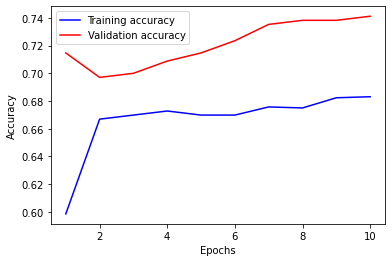

In [18]:
## Affichage des données d'entraînement

# Récupération des informations concernant l'entraînement
train_acc = training_history.history['accuracy']
val_acc   = training_history.history['val_accuracy']

## Préparation du graphe
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe sur l'évolution de la précision sur la partie JDD entraînement
plt.plot(np.arange(1, len(train_acc) + 1), train_acc, label='Training accuracy', color='blue')

# Courbe sur l'évoution de la précision sur la partie JDD validation
plt.plot(np.arange(1, len(val_acc) + 1), val_acc, label='Validation accuracy', color='red')

# Affichage
plt.legend()
plt.show()

In [19]:
## Prédiction
y_pred = clf_nn.predict(X_test_scaled).argmax(axis=1)

In [20]:
## Matrice de confusion sur le JDD de test
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0.0,134,79
1.0,74,139


In [21]:
## Affichage du rapport d'évaluation
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.63      0.64       213
         1.0       0.64      0.65      0.65       213

    accuracy                           0.64       426
   macro avg       0.64      0.64      0.64       426
weighted avg       0.64      0.64      0.64       426



### 5. Réseau de neurones V2

In [46]:
## Préparation du réseau de neuronnes

# Instanciation
clf2_nn = Sequential()

# Ajout de la première couche
clf2_nn.add(Dense(units=100,
              input_dim=X_train_scaled.shape[1],
              kernel_initializer='normal',
              activation='relu'))

clf2_nn.add(Dropout(0.3))
clf2_nn.add(Dense(units=50,
                  activation='relu'))
clf2_nn.add(Dropout(0.3))
clf2_nn.add(Dense(units=20,
                  activation='relu'))
clf2_nn.add(Dropout(0.3))
clf2_nn.add(Dense(units=10,
                  activation='relu'))
clf2_nn.add(Dense(units=2,
                  activation='softmax'))

# Compilation
clf2_nn.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [47]:
## Affichage du réseau de neuronnes
clf2_nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               3800      
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 20)                1020      
_________________________________________________________________
dropout_11 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

In [48]:
## Entraînement du réseau de neuronnes
training_history2 = clf2_nn.fit(X_train_scaled, y_train_nn,
                              epochs=100,
                              batch_size=64,
                              validation_split=.2)

Epoch 1/100
22/22 [==============================] - 0s 7ms/step - loss: 0.6718 - accuracy: 0.5794 - val_loss: 0.5939 - val_accuracy: 0.7412
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.6449 - val_loss: 0.5359 - val_accuracy: 0.7382
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.6706 - val_loss: 0.5330 - val_accuracy: 0.7500
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6765 - val_loss: 0.5329 - val_accuracy: 0.7382
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6662 - val_loss: 0.5415 - val_accuracy: 0.7441
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.6772 - val_loss: 0.5294 - val_accuracy: 0.7412
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.6941 - val_loss: 0.5234 - val_accuracy: 0.7559
Epoch 8/100
2

Epoch 59/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8029 - val_loss: 0.5339 - val_accuracy: 0.7088
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8235 - val_loss: 0.5476 - val_accuracy: 0.7265
Epoch 61/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8051 - val_loss: 0.5324 - val_accuracy: 0.7000
Epoch 62/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8228 - val_loss: 0.5419 - val_accuracy: 0.7265
Epoch 63/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7846 - val_loss: 0.5554 - val_accuracy: 0.7147
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8176 - val_loss: 0.5324 - val_accuracy: 0.7206
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8140 - val_loss: 0.5454 - val_accuracy: 0.7206
Epoch 

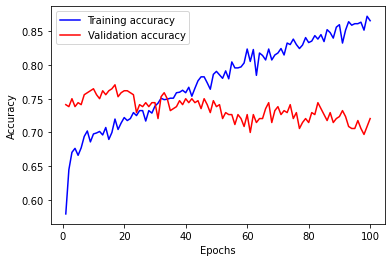

In [49]:
## Affichage des données d'entraînement

# Récupération des informations concernant l'entraînement
train_acc2 = training_history2.history['accuracy']
val_acc2   = training_history2.history['val_accuracy']

## Préparation du graphe
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe sur l'évolution de la précision sur la partie JDD entraînement
plt.plot(np.arange(1, len(train_acc2) + 1), train_acc2, label='Training accuracy', color='blue')

# Courbe sur l'évoution de la précision sur la partie JDD validation
plt.plot(np.arange(1, len(val_acc2) + 1), val_acc2, label='Validation accuracy', color='red')

# Affichage
plt.legend()
plt.show()

In [50]:
## Prédiction
y_pred2 = clf2_nn.predict(X_test_scaled).argmax(axis=1)

In [51]:
## Matrice de confusion sur le JDD de test
pd.crosstab(y_test, y_pred2, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0.0,140,73
1.0,78,135


In [52]:
## Affichage du rapport d'évaluation
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65       213
         1.0       0.65      0.63      0.64       213

    accuracy                           0.65       426
   macro avg       0.65      0.65      0.65       426
weighted avg       0.65      0.65      0.65       426

